<a href="https://colab.research.google.com/github/egyptai/DecisionTree/blob/main/20210604DtreeIncome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.multioutput import MultiOutputClassifier

In [18]:
from google.colab import files
myfile = files.upload()

Saving income(1).csv to income(1) (2).csv


In [30]:
income = pd.read_csv("income(1).csv", index_col=False)

In [31]:
income.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [32]:
cat_income = income.copy()

In [33]:
cat_features = ["workclass", "education_num", "marital_status", "occupation", 
                "relationship", "race", "sex","native_country", "income"]

In [34]:
le = {}
for c in cat_features:
    le[c] = LabelEncoder()
    cat_income[c] = le[c].fit_transform(cat_income[c])

In [35]:
cat_income.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income
0,39,7,12,4,1,1,4,1,40,39,0
1,50,6,12,2,4,0,4,1,13,39,0
2,38,4,8,0,6,1,4,1,40,39,0
3,53,4,6,2,6,0,2,1,40,39,0
4,28,4,12,2,10,5,2,0,40,5,0


In [36]:
le['workclass'].inverse_transform([7])
le['workclass'].transform([' State-gov'])

array([7])

In [37]:
data = np.array(cat_income)
feature_data = data[:, :-1]
target_data = data[:, -1]
trainX, testX, trainY, testY = train_test_split(feature_data, target_data, test_size = 0.2)

In [38]:
testGini = []
depth = []
for k in range(1, 20):
    dt = DecisionTreeClassifier(criterion='gini', max_depth=k)
    dt.fit(trainX, trainY)
    
    testGini.append(dt.score(testX, testY))
    
    depth.append(k)
    print('depth = %d done.' % k)

depth = 1 done.
depth = 2 done.
depth = 3 done.
depth = 4 done.
depth = 5 done.
depth = 6 done.
depth = 7 done.
depth = 8 done.
depth = 9 done.
depth = 10 done.
depth = 11 done.
depth = 12 done.
depth = 13 done.
depth = 14 done.
depth = 15 done.
depth = 16 done.
depth = 17 done.
depth = 18 done.
depth = 19 done.


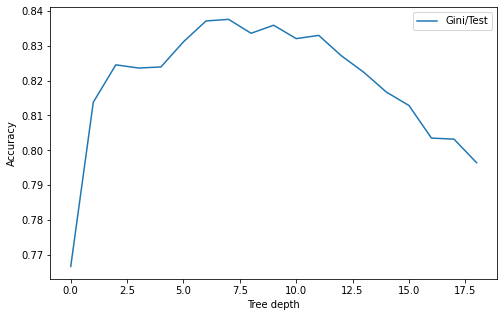

In [39]:
plt.figure(figsize=(8, 5))
plt.plot(testGini, label = "Gini/Test")
plt.legend()
plt.xlabel("Tree depth")
plt.ylabel("Accuracy")
plt.show()

In [40]:
nDepth = depth[np.argmax(testGini)]

In [41]:
dt = DecisionTreeClassifier(max_depth = nDepth)
dt.fit(trainX, trainY)
print('시험 데이터의 정확도 = %.4f' % dt.score(testX, testY))
print('최적 트리의 depth = %d' % nDepth)

시험 데이터의 정확도 = 0.8368
최적 트리의 depth = 8


In [42]:
feat_impo = dt.feature_importances_
feat_name = income.columns

In [43]:
idx = np.argsort(feat_impo)[::-1][:5]
np.array(feat_name)[idx]

array(['relationship', 'education_num', 'age', 'hours_per_week',
       'occupation'], dtype=object)